## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Dataset Files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = ("/content/drive/My Drive/Colab Notebooks/")

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'Train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'Copy of test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'Copy of sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'Copy of labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd

In [0]:
dbc_labels=pd.read_csv('labels.csv')

In [10]:
dbc_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [11]:
dbc_labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [12]:
dbc_labels.shape

(10222, 2)

Reducing the data count because experienced RAM issue while running with full load of data

In [0]:
dbc_labels=dbc_labels[0:2000]

In [14]:
dbc_labels['breed'].value_counts()

bedlington_terrier             26
bernese_mountain_dog           26
lakeland_terrier               26
basenji                        25
blenheim_spaniel               24
                               ..
german_shepherd                10
saint_bernard                  10
great_dane                     10
briard                          8
soft-coated_wheaten_terrier     8
Name: breed, Length: 120, dtype: int64

In [15]:
dbc_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Get one-hot encodings of labels

In [0]:
dbc_labels_1=pd.get_dummies(dbc_labels['breed'])

In [0]:
dbc_labels_1['id']=dbc_labels['id']

In [18]:
dbc_labels_1.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier,id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,000bec180eb18c7604dcecc8fe0dba07
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001513dfcb2ffafc82cccf4d8bbaba97
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,001cdf01b096e06d78e9e5112d419397
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,00214f311d5d2247d5dfe4fe24b2303d
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0021f9ceb3235effd7fcde7f7538ed62


In [19]:
dbc_labels_1.shape

(2000, 121)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols=128
num_channel=1

In [0]:
labels=pd.read_csv('labels.csv')

In [22]:
from tqdm import tqdm
import cv2
x_feature=[]
y_feature=[]

for f, img in tqdm(dbc_labels.values):
  train_img =cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize=cv2.resize(train_img, (img_rows, img_cols))
  x_feature.append(train_img_resize)
  y_feature.append(img)

100%|██████████| 2000/2000 [00:06<00:00, 315.89it/s]


In [23]:
dbc_labels_1['id'][0:1]

0    000bec180eb18c7604dcecc8fe0dba07
Name: id, dtype: object

In [24]:
y_feature[0]

'boston_bull'

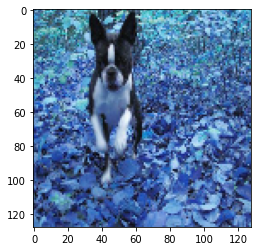

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x_feature[0])

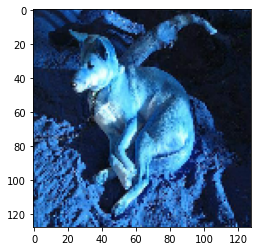

In [26]:
import matplotlib.pyplot as plt
plt.imshow(x_feature[1])

In [27]:
y_feature[1]

'dingo'

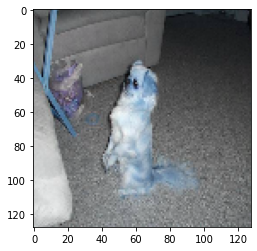

In [28]:
import matplotlib.pyplot as plt
plt.imshow(x_feature[2])

In [29]:
y_feature[2]

'pekinese'

In [30]:
print(len(x_feature))

2000


In [31]:
print(len(y_feature))

2000


In [32]:
x_feature[0]

array([[[ 69, 116, 173],
        [ 38,  91, 136],
        [102, 166, 204],
        ...,
        [130, 204, 237],
        [ 85, 193, 220],
        [ 59, 138, 170]],

       [[ 42,  77, 118],
        [142, 180, 216],
        [119, 162, 197],
        ...,
        [ 80, 152, 194],
        [101, 183, 218],
        [ 74, 177, 212]],

       [[ 65, 107, 151],
        [ 57, 103, 147],
        [ 66, 107, 153],
        ...,
        [ 37, 121, 172],
        [ 73, 145, 183],
        [ 64, 168, 207]],

       ...,

       [[ 77, 119, 190],
        [ 66, 121, 186],
        [ 66, 122, 183],
        ...,
        [ 70,  91, 159],
        [ 59,  89, 154],
        [ 91, 132, 184]],

       [[ 65, 118, 185],
        [ 72, 124, 190],
        [ 74, 125, 187],
        ...,
        [ 54,  63, 132],
        [ 74, 116, 169],
        [121, 169, 223]],

       [[ 63, 116, 183],
        [ 73, 125, 191],
        [ 76, 127, 190],
        ...,
        [ 50,  51, 127],
        [ 31,  62, 128],
        [ 90, 145, 198]]

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_data=np.array(x_feature)

In [34]:
x_data.shape

(2000, 128, 128, 3)

In [35]:
x_data[0:1].shape

(1, 128, 128, 3)

In [36]:
x_data.dtype

dtype('uint8')

In [0]:
x_data = x_data.astype('float64')

In [38]:
x_data /= 255
print('x_data shape:', x_data.shape)
print(x_data.shape[0], 'data samples')
print(x_data.shape[0], 'data samples')

x_data shape: (2000, 128, 128, 3)
2000 data samples
2000 data samples


In [0]:
x_train_data=x_data

In [40]:
print(y_feature)

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'bluetick', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'otterhound', 'bedlington_terrier', 'dingo', 'golden_retriever', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'walker_hound', 'weimaraner', 'giant_schnauzer', 'golden_retriever', 'boston_bull', 'groenendael', 'lakeland_terrier', 'irish_water_spaniel', 'dhole', 'dingo', 'affenpinscher', 'toy_poodle', 'border_terrier', 'lakeland_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'african_hunting_dog', 'irish_water_spaniel', 'walker_hound', 'irish_water_spaniel', 'wire-haired_fox_terrier', 'giant_schnauzer', 'affenpinscher', 'shih-tz

In [0]:
y_data=np.array(y_feature)

In [42]:
y_data.shape

(2000,)

In [43]:
np.unique(y_feature)

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [0]:
y_train_data=dbc_labels_1.drop(['id'],axis=1)

In [45]:
y_train_data.shape

(2000, 120)

In [0]:
y_train_data=np.array(y_train_data)

In [47]:
y_train_data.shape

(2000, 120)

In [48]:
y_train_data[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [49]:
x_train_data.shape

(2000, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=2)
print (len(X_train))
print (len(X_test))
print (len(y_train))
print (len(y_test))

1600
400
1600
400


In [51]:
y_train.shape

(1600, 120)

In [52]:
X_train.shape

(1600, 128, 128, 3)

In [53]:
print(X_test.shape)
print(y_test.shape)

(400, 128, 128, 3)
(400, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
img_rows=128
img_cols=128
num_channel=1

In [0]:
test_img_1=pd.read_csv('sample_submission.csv')

In [56]:
test_img_1.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
test_data=test_img_1[0:2000]

In [0]:
test_img = test_data['id']

Run the below code to load the test image files in x_test_feature

In [59]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 2000/2000 [00:02<00:00, 668.33it/s]


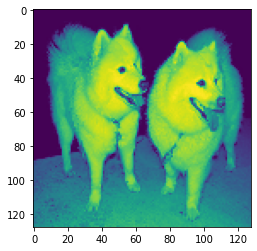

In [60]:
import matplotlib.pyplot as plt
plt.imshow(x_test_feature[1])

Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_data=np.array(x_test_feature)

In [62]:
x_test_data.shape

(2000, 128, 128)

In [63]:
x_test_data = x_test_data.astype('float64')
x_test_data /= 255
print('x_test_data shape:', x_test_data.shape)
print(x_test_data.shape[0], 'data samples')
print(x_test_data.shape[0], 'data samples')

x_test_data shape: (2000, 128, 128)
2000 data samples
2000 data samples


In [0]:
x_test_data = x_test_data.reshape(x_test_data.shape[0], 128, 128, 1) #transform 2D 28x28 matrix to 3D (28x28x1) matrix

In [65]:
x_test_data.shape

(2000, 128, 128, 1)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [66]:
# Define model
    model1 = Sequential()

    # 1st Conv Layer
    model1.add(Convolution2D(5, 3, 3, input_shape=(128, 128, 3)))
    model1.add(Activation('relu'))

    # 2nd Conv Layer
    model1.add(Convolution2D(5, 3, 3))
    model1.add(Activation('relu'))

    # Fully Connected Layer
    model1.add(Flatten())
    model1.add(Dense(256))
    model1.add(Activation('relu'))

    # Prediction Layer
    model1.add(Dense(120))
    model1.add(Activation('softmax'))

    # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), input_shape=(128, 128,...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3))`
  


### Use batch_size = 128 and epochs = 10 and execute the model

In [67]:
# Train the model1
    Output1=model1.fit(X_train, y_train, batch_size=128, nb_epoch=10, 
              validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 8s 5ms/step - loss: 5.0680 - accuracy: 0.0063 - val_loss: 4.8023 - val_accuracy: 0.0050
Epoch 2/10
1600/1600 [==============================] - 1s 832us/step - loss: 4.6625 - accuracy: 0.0519 - val_loss: 4.8169 - val_accuracy: 0.0075
Epoch 3/10
1600/1600 [==============================] - 1s 847us/step - loss: 4.3975 - accuracy: 0.1519 - val_loss: 4.8546 - val_accuracy: 0.0150
Epoch 4/10
1600/1600 [==============================] - 1s 846us/step - loss: 3.8381 - accuracy: 0.2812 - val_loss: 4.9113 - val_accuracy: 0.0100
Epoch 5/10
1600/1600 [==============================] - 1s 834us/step - loss: 2.7562 - accuracy: 0.5631 - val_loss: 5.0769 - val_accuracy: 0.0125
Epoch 6/10
1600/1600 [==============================] - 1s 854us/step - loss: 1.6279 - accuracy: 0.8069 - val_loss: 5.3137 - val_accuracy: 0.0125
Epoch 7/10
1600/1600 [==============================] - 1s 846us/step - loss: 0

In [68]:
loss_and_metrics = model1.evaluate(X_test, y_test)
print(loss_and_metrics)

400/400 [==============================] - 0s 553us/step
[5.941346588134766, 0.02250000089406967]


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

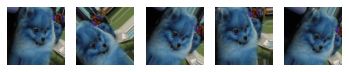

In [71]:
gen = datagen.flow(X_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

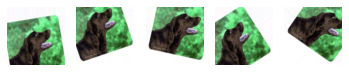

In [72]:
gen = datagen.flow(X_test[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
# Prepare the generator
datagen.fit(X_train)
datagen.fit(X_test)

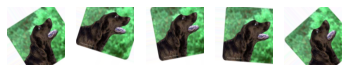

In [74]:
gen = datagen.flow(X_test[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

In [75]:
# Train the model1
    Output1=model1.fit(X_train, y_train, batch_size=128, nb_epoch=10, 
              validation_data=(X_test, y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/10
 256/1600 [===>..........................] - ETA: 1s - loss: 0.0217 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


1600/1600 [==============================] - 1s 854us/step - loss: 0.0275 - accuracy: 0.9987 - val_loss: 5.8656 - val_accuracy: 0.0200
Epoch 2/10
1600/1600 [==============================] - 1s 850us/step - loss: 0.0132 - accuracy: 0.9987 - val_loss: 5.7887 - val_accuracy: 0.0250
Epoch 3/10
1600/1600 [==============================] - 1s 850us/step - loss: 0.0111 - accuracy: 0.9994 - val_loss: 6.0531 - val_accuracy: 0.0225
Epoch 4/10
1600/1600 [==============================] - 1s 847us/step - loss: 0.0122 - accuracy: 0.9994 - val_loss: 5.9824 - val_accuracy: 0.0225
Epoch 5/10
1600/1600 [==============================] - 1s 851us/step - loss: 0.0199 - accuracy: 0.9987 - val_loss: 6.3206 - val_accuracy: 0.0200
Epoch 6/10
1600/1600 [==============================] - 1s 850us/step - loss: 0.0133 - accuracy: 0.9994 - val_loss: 5.7233 - val_accuracy: 0.0150
Epoch 7/10
1600/1600 [==============================] - 1s 845us/step - loss: 0.0170 - accuracy: 0.9987 - val_loss: 5.8920 - val_accura

In [76]:
loss_and_metrics = model1.evaluate(X_test, y_test)
print(loss_and_metrics)

400/400 [==============================] - 0s 441us/step
[5.844098014831543, 0.019999999552965164]


# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg', input_shape = (128,128,3))

Print the summary of the base_model

In [78]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [0]:
for layer in base_model.layers[:20]:
    layer.trainable = False

In [80]:
for layer in base_model.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fac4041f4a8> False
<keras.layers.convolutional.Conv2D object at 0x7fac4041f1d0> False
<keras.layers.convolutional.Conv2D object at 0x7fac4041f668> False
<keras.layers.pooling.MaxPooling2D object at 0x7fac26cc0be0> False
<keras.layers.convolutional.Conv2D object at 0x7fac26d349b0> False
<keras.layers.convolutional.Conv2D object at 0x7fac26ce9630> False
<keras.layers.pooling.MaxPooling2D object at 0x7fac26c7a470> False
<keras.layers.convolutional.Conv2D object at 0x7fac26c7a2b0> False
<keras.layers.convolutional.Conv2D object at 0x7fac26c7af98> False
<keras.layers.convolutional.Conv2D object at 0x7fac26c80a20> False
<keras.layers.pooling.MaxPooling2D object at 0x7fac26c854a8> False
<keras.layers.convolutional.Conv2D object at 0x7fac26c852e8> False
<keras.layers.convolutional.Conv2D object at 0x7fac26c85fd0> False
<keras.layers.convolutional.Conv2D object at 0x7fac26c8cb70> False
<keras.layers.pooling.MaxPooling2D object at 0x7fac26c925f8>

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
base_model_2=Sequential()

base_model_2.add(base_model)
# Fully Connected Layer 1
#base_model_2.add(Flatten())
base_model_2.add(Dense(1024))
base_model_2.add(Activation('relu'))

    #Layer 2
base_model_2.add(Dense(256))
base_model_2.add(Activation('relu'))

# Prediction Layer
base_model_2.add(Dense(120))
base_model_2.add(Activation('softmax'))

# Loss and Optimizer
base_model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
#Done above

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [83]:
# Train the base_model_2
    Output1=base_model_2.fit(X_train, y_train, batch_size=128, nb_epoch=10, 
              validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 12s 8ms/step - loss: 4.8171 - accuracy: 0.0100 - val_loss: 4.7806 - val_accuracy: 0.0025
Epoch 2/10
1600/1600 [==============================] - 6s 4ms/step - loss: 4.6932 - accuracy: 0.0306 - val_loss: 4.7873 - val_accuracy: 0.0075
Epoch 3/10
1600/1600 [==============================] - 6s 4ms/step - loss: 4.5919 - accuracy: 0.0381 - val_loss: 4.7483 - val_accuracy: 0.0300
Epoch 4/10
1600/1600 [==============================] - 6s 4ms/step - loss: 4.4622 - accuracy: 0.0556 - val_loss: 4.7147 - val_accuracy: 0.0300
Epoch 5/10
1600/1600 [==============================] - 6s 4ms/step - loss: 4.3137 - accuracy: 0.0906 - val_loss: 4.6105 - val_accuracy: 0.0475
Epoch 6/10
1600/1600 [==============================] - 6s 4ms/step - loss: 4.1352 - accuracy: 0.1081 - val_loss: 4.5835 - val_accuracy: 0.0525
Epoch 7/10
1600/1600 [==============================] - 6s 4ms/step - loss: 3.9130 - acc

In [84]:
base_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
activation_5 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               30840     
_________________________________________________________________
activation_7 (Activation)    (None, 120)              

In [85]:
# Train the base_model_2
    Output1=base_model_2.fit(X_train, y_train, batch_size=128, nb_epoch=25, 
              validation_data=(X_test, y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/25


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


1600/1600 [==============================] - 6s 4ms/step - loss: 3.1244 - accuracy: 0.2844 - val_loss: 4.3376 - val_accuracy: 0.0700
Epoch 2/25
1600/1600 [==============================] - 6s 4ms/step - loss: 2.9927 - accuracy: 0.3162 - val_loss: 4.2359 - val_accuracy: 0.0725
Epoch 3/25
1600/1600 [==============================] - 6s 4ms/step - loss: 2.7970 - accuracy: 0.3512 - val_loss: 4.1778 - val_accuracy: 0.0825
Epoch 4/25
1600/1600 [==============================] - 6s 4ms/step - loss: 2.6540 - accuracy: 0.3725 - val_loss: 4.1936 - val_accuracy: 0.0775
Epoch 5/25
1600/1600 [==============================] - 6s 4ms/step - loss: 2.4992 - accuracy: 0.4175 - val_loss: 4.1967 - val_accuracy: 0.0875
Epoch 6/25
1600/1600 [==============================] - 6s 4ms/step - loss: 2.3965 - accuracy: 0.4394 - val_loss: 4.1724 - val_accuracy: 0.0875
Epoch 7/25
1600/1600 [==============================] - 6s 4ms/step - loss: 2.2568 - accuracy: 0.4656 - val_loss: 4.2328 - val_accuracy: 0.1050
Epo

In [86]:
# Train the base_model_2
    Output1=base_model_2.fit(X_train, y_train, batch_size=100, nb_epoch=50, 
              validation_data=(X_test, y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


1600/1600 [==============================] - 10s 6ms/step - loss: 0.8340 - accuracy: 0.8475 - val_loss: 4.8613 - val_accuracy: 0.1075
Epoch 2/50
1600/1600 [==============================] - 6s 4ms/step - loss: 0.7509 - accuracy: 0.8612 - val_loss: 4.9157 - val_accuracy: 0.1000
Epoch 3/50
1600/1600 [==============================] - 6s 4ms/step - loss: 0.7058 - accuracy: 0.8744 - val_loss: 5.1047 - val_accuracy: 0.0925
Epoch 4/50
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6589 - accuracy: 0.8819 - val_loss: 5.1101 - val_accuracy: 0.1125
Epoch 5/50
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6093 - accuracy: 0.9025 - val_loss: 5.2235 - val_accuracy: 0.0975
Epoch 6/50
1600/1600 [==============================] - 6s 4ms/step - loss: 0.5670 - accuracy: 0.9106 - val_loss: 5.3444 - val_accuracy: 0.0950
Epoch 7/50
1600/1600 [==============================] - 6s 4ms/step - loss: 0.5345 - accuracy: 0.9212 - val_loss: 5.3080 - val_accuracy: 0.0875
Ep